In [1]:
import pandas as pd
import numpy as np

import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
#scope = ["https://www.googleapis.com/auth/spreadsheets", "https://www.googleapis.com/auth/drive"]


# Credentials JSON file
creds = ServiceAccountCredentials.from_json_keyfile_name('croplandepidemiology_weather_database_key.json', scope)

# Authorize the client
client = gspread.authorize(creds)

# Open the sheet by name
sheet = client.open("Cropland_Epidemiology_Weather_Data").sheet1
#sheet = client.open_by_key("1U49dGjWgqakGDLVREN-k7_XE68AWrWe41Vs5KSOy3dI").sheet1


# Fetch all data
data = sheet.get_all_records()

#print(data)

In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import json

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Path to the credentials JSON file
credentials_file = 'croplandepidemiology_weather_database_key.json'

# Path to the local data file
local_data_file = "DATA.json"

try:
    # Load credentials and authorize the client
    creds = ServiceAccountCredentials.from_json_keyfile_name(credentials_file, scope)
    client = gspread.authorize(creds)

    # Open the sheet by name
    sheet = client.open("Cropland_Epidemiology_Weather_Data").sheet1

    # Fetch all data
    data = sheet.get_all_records()

    # Save the data to a local file
    with open(local_data_file, "w") as d:
        json.dump(data, d, indent=4)

    print("Data successfully fetched from Google Sheets and saved locally.")

except Exception as e:
    print(f"Failed to access Google Sheets: {e}")
    print("Attempting to load data from the local file.")

    try:
        # Read the data from the local file
        with open(local_data_file, "r") as r:
            data = json.load(r)
            print("Data successfully loaded from the local file.")
    except FileNotFoundError:
        print("Local data file not found. No data available.")
        data = []

# Print the loaded data (optional)
print(data)


Failed to access Google Sheets: HTTPSConnectionPool(host='oauth2.googleapis.com', port=443): Max retries exceeded with url: /token (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f02ea929110>: Failed to resolve 'oauth2.googleapis.com' ([Errno -3] Temporary failure in name resolution)"))
Attempting to load data from the local file.
Data successfully loaded from the local file.
[{'Date': '11/12/2024 13:07:01', 'City': 'Nairobi', 'Temperature': 23.93, 'Humidity': 46, 'Wind Speed': 5.14, 'Precipitation': '', 'Rain': '', 'Snow': ''}, {'Date': '11/12/2024 13:07:01', 'City': 'Lima', 'Temperature': 18.28, 'Humidity': 85, 'Wind Speed': 3.6, 'Precipitation': '', 'Rain': '', 'Snow': ''}, {'Date': '11/12/2024 13:07:01', 'City': 'Beijing', 'Temperature': 3.94, 'Humidity': 36, 'Wind Speed': 1.1, 'Precipitation': '', 'Rain': '', 'Snow': ''}, {'Date': '11/12/2024 13:07:02', 'City': 'New Delhi', 'Temperature': 22.09, 'Humidity': 17, 'Wind Speed': 3.6, 'Precipitation': '

In [3]:
PotatoDiseaseDatapath = '/home/shadrack/Documents/CIPotatoe/drafts/potatoDiseaseprofile.csv'
AgroEcologyZonespath = '/home/shadrack/Documents/CIPotatoe/drafts/EpidemiologyAgroecologicalZones.csv'
PotatoDiseaseData = pd.read_csv(PotatoDiseaseDatapath)
AgroEcologyZones = pd.read_csv(AgroEcologyZonespath)

In [4]:
AgroEcologyZones

,City,Country,Region/County,Agroecological Zone
0,Nairobi,Kenya,Nairobi County,Tropical Highland Zone
1,Lima,Peru,Lima Region,Coastal Zone
2,Beijing,China,Beijing Municipality,Temperate Zone
3,New Delhi,India,Delhi,Semi-Arid Zone
4,Kampala,Uganda,Central Region,Tropical Highland Zone
...,...,...,...,...
170,Kanungu,Uganda,Western Region,Tropical Highland Zone
171,Ntungamo,Uganda,Western Region,Tropical Highland Zone
172,Rwashamaire,Uganda,Western Region,Tropical Highland Zone
173,Rubanda,Uganda,Western Region,Tropical Highland Zone


In [5]:
AgroEcologyZones = AgroEcologyZones.rename(columns=lambda x: x.strip())
AgroEcologyZones = AgroEcologyZones.map(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
data = pd.DataFrame(data)
#data

In [7]:
AgroEcologyZones

,City,Country,Region/County,Agroecological Zone
0,Nairobi,Kenya,Nairobi County,Tropical Highland Zone
1,Lima,Peru,Lima Region,Coastal Zone
2,Beijing,China,Beijing Municipality,Temperate Zone
3,New Delhi,India,Delhi,Semi-Arid Zone
4,Kampala,Uganda,Central Region,Tropical Highland Zone
...,...,...,...,...
170,Kanungu,Uganda,Western Region,Tropical Highland Zone
171,Ntungamo,Uganda,Western Region,Tropical Highland Zone
172,Rwashamaire,Uganda,Western Region,Tropical Highland Zone
173,Rubanda,Uganda,Western Region,Tropical Highland Zone


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
data 
df = pd.DataFrame(data)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y %H:%M:%S")

# Sort by Date
df.sort_values('Date', inplace=True)

# Function to calculate mean for the last 3 intervals per city
def calculate_mean_last_intervals_per_city(df, column, intervals=3):
    means = df.groupby('City').apply(lambda group: group.tail(intervals)[column].mean())
    return means

# Calculate mean Temperature, Wind Speed, Humidity, Precipitation, Rain, and Snow for the last 3 intervals per city
mean_temperature = calculate_mean_last_intervals_per_city(df, 'Temperature')
mean_wind_speed = calculate_mean_last_intervals_per_city(df, 'Wind Speed')
mean_humidity = calculate_mean_last_intervals_per_city(df, 'Humidity')
mean_precipitation = calculate_mean_last_intervals_per_city(df, 'Precipitation')
mean_rain = calculate_mean_last_intervals_per_city(df, 'Rain')
mean_snow = calculate_mean_last_intervals_per_city(df, 'Snow')

# Tabulate the results into a DataFrame
results = pd.DataFrame({
    'Mean Temperature': mean_temperature,
    'Mean Wind Speed': mean_wind_speed,
    'Mean Humidity': mean_humidity,
    'Mean Precipitation': mean_precipitation,
    'Mean Rain': mean_rain,
    'Mean Snow': mean_snow
})

print("Results for the last 3 intervals per city:")
#print(results)
results = results.reset_index()

merged_df = pd.merge(results, AgroEcologyZones, on='City', how='outer')
# Predict future trend for Temperature using Linear Regression
# Prepare data for Linear Regression
df['Timestamp'] = df['Date'].apply(lambda x: x.timestamp())

predictions = {}
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    X = city_df[['Timestamp']]
    y = city_df['Temperature']

    model = LinearRegression()
    model.fit(X, y)

    # Predict future value
    future_date = datetime.strptime("12/12/2024 13:07:01", "%d/%m/%Y %H:%M:%S")
    future_timestamp = future_date.timestamp()
    future_temperature = model.predict([[future_timestamp]])[0]
    predictions[city] = future_temperature
"""
    # Visualize trend
    plt.figure(figsize=(10, 6))
    plt.scatter(city_df['Date'], city_df['Temperature'], label="Actual Data")
    plt.plot(city_df['Date'], model.predict(X), color='red', label="Trend Line")
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Trend for {city}')
    plt.legend()
    plt.show()
"""
print("\nPredicted Temperatures for 12/12/2024 per city:")
for city, temp in predictions.items():
    temp_predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['Temperature'])
    temp_predictions_df.index.name = 'City'
    # Print the DataFram
#print(temp_predictions_df)

    #print(f"{city}: {temp:.2f}")


/tmp/ipykernel_7121/3298408406.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  means = df.groupby('City').apply(lambda group: group.tail(intervals)[column].mean())
/tmp/ipykernel_7121/3298408406.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  means = df.groupby('City').apply(lambda group: group.tail(intervals)[column].mean())
/tmp/ipykernel_7121/3298408406.py:19: DeprecationWarning: DataFrameGroup

Results for the last 3 intervals per city:


/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearReg


Predicted Temperatures for 12/12/2024 per city:


/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/shadrack/Documents/CIPotatoe/CIP_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearReg

In [14]:
display(merged_df)

,City,Mean Temperature,Mean Wind Speed,Mean Humidity,Mean Precipitation,Mean Rain,Mean Snow,Country,Region/County,Agroecological Zone
0,Abancay,18.386667,3.023333,74.000000,0.0,0.0,0.0,Peru,Apurímac Region,Highland Zone
1,Agra,11.290000,1.710000,25.666667,0.0,0.0,0.0,India,Uttar Pradesh,Semi-Arid Zone
2,Ahmedabad,14.353333,3.086667,56.333333,0.0,0.0,0.0,India,Gujarat,Semi-Arid Zone
3,Aligarh,10.950000,1.833333,26.000000,0.0,0.0,0.0,India,Uttar Pradesh,Semi-Arid Zone
4,Almora,7.553333,0.436667,43.000000,0.0,0.0,0.0,India,Uttarakhand,Humid Subtropical Zone
...,...,...,...,...,...,...,...,...,...,...
172,Yinchuan,-11.370000,1.750000,86.333333,0.0,0.0,0.0,China,Ningxia,Arid Zone
173,Yongchuan,6.120000,0.853333,74.333333,0.0,0.0,0.0,China,Chongqing Municipality,Humid Subtropical Zone
174,Yulin,11.796667,1.820000,29.666667,0.0,0.0,0.0,China,Shaanxi,Arid Zone
175,Zhongwei,-1.960000,0.956667,27.666667,0.0,0.0,0.0,China,Ningxia,Arid Zone


In [10]:
"""The epidemiological model desinged to estimate the prevalence and the spread of potato disease
across potato growing regions; fcusing on the cimatic conditions favoring disease causing pathogen
to proliferate in regions and the risk factor that other parameters such as trade routes, seed storage
seed handling, the alternative crop that pest and pathogens could hibernate to. All this risk factors a
aare captured into the model whereby the collective factors in a region/designated node are encompased as a vector unit
collectively ths vector unit is the risk factor of that node and the movement of seed and people
from one node to another posses the risk of spread of the disease. The disease can also be moved by 
animals wind direction floods and other natural phenomenas that are caused by climate change
The moment the risk vector move or transitions to another node there is some transformation in the vector risk
favtor  and thus making the vector to transform according to the influence of the transforming function/vector and in this case
it is the vector unit of risk assocated with movement such as trade routes either passing through disease infested 
areas or seed being poorly handled as it is moved from one farmer to another in the market place. this vector transform the
node vector that is moving and the vector that reaches the next node will be different or transformed accordingly.
Now the host node also has its risk vector and once the new vector come sin the nodes vector becomes a matrix encompassed 
by these two vectors"""

import pandas as pd
import numpy as np
from numpy.linalg import norm, det
import requests

# Define the dataset path and read the data
#potatoDispath = '/kaggle/input/potatodisease/potatoDiseaseprofile.csv'
#potatoDiseasedata = pd.read_csv(potatoDispath)
disease_data = PotatoDiseaseData

# Helper function to parse temperature and other ranges
def parse_range(range_str):
    """Parse string ranges (e.g., '20-25°C') into tuples of floats."""
    return tuple(map(float, range_str.replace("°C", "").replace("%", "").split('-')))

# Sample regional data structure
data = pd.DataFrame({
    'Region': ['Kenya', 'Tanzania', 'Peru', 'India', 'China'],
    'Avg_Temperature': [22, 15, 24, 18, 20],
    'Humidity': [75, 85, 80, 70, 65],
    'Soil_pH': [6.0, 5.5, 6.5, 5.8, 5.6],
    'Sun_Intensity': ['Moderate', 'Low', 'Moderate', 'High', 'Moderate']
})

# Suitability calculation
def calculate_suitability_from_disease_data(region_data, disease_data):
    suitability_scores = {}
    for _, disease_row in disease_data.iterrows():
        disease_name = disease_row['Disease/Disorder']
        temp_range = parse_range(disease_row['Ideal Temperature Range (°C)'])
        pH_range = parse_range(disease_row['Ideal pH Range'])
        humidity_range = parse_range(disease_row['Ideal Humidity Range'])
        # We now look at the ideal range for the region/nodes in our model and compare if 
        # they are within the ideal range as in temp, humidity soil pH
        temp_suitability = int(temp_range[0] <= region_data['Avg_Temperature'] <= temp_range[1])
        pH_suitability = int(pH_range[0] <= region_data['Soil_pH'] <= pH_range[1])
        humidity_suitability = int(humidity_range[0] <= region_data['Humidity'] <= humidity_range[1])
        # Here we add the totals we can later explore the posibility of using the interaction between these factors
        # We can add other factors that might be interacting and contributing to the occurence of disease
        total_score = temp_suitability + pH_suitability + humidity_suitability
        suitability_scores[disease_name] = total_score
    return suitability_scores

# Calculate suitability for each region
data['Suitability_Scores'] = data.apply(lambda x: calculate_suitability_from_disease_data(x, disease_data), axis=1)

class CroplandNode:
    def __init__(self, name, climate_zone, temp_change, alt_hosts, disease_prevalence, cropping_systems):
        self.name = name
        self.climate_zone = climate_zone
        self.temp_change = temp_change
        self.alt_hosts = alt_hosts
        self.disease_prevalence = disease_prevalence
        self.cropping_systems = cropping_systems
        self.zone_value = self.assign_zone_value()
        self.cropping_system_value = self.assign_cropping_system_value()
        self.temp_change_value = self.assign_temp_change_value()

    def assign_zone_value(self):
        zone_mapping = {"Tropical Highland": 1, "Subtropical Lowland": 2, "Temperate": 3, "Arid": 4, "Humid Tropical": 5}
        base_value = zone_mapping.get(self.climate_zone, 0)
        adjusted_value = base_value + (self.disease_prevalence / 100)
        return round(adjusted_value, 2)

    def assign_cropping_system_value(self):
        cropping_mapping = {"Monoculture": 1, "Intercropping with maize": 2, "Intercropping with beans": 3, "Agroforestry": 4, "Crop rotation with cereals": 5}
        base_value = cropping_mapping.get(self.cropping_systems, 0)
        adjusted_value = base_value + (self.disease_prevalence / 100)
        return round(adjusted_value, 2)

    def assign_temp_change_value(self):
        if self.temp_change < 0:
            base_value = 1
        elif 0 <= self.temp_change < 1:
            base_value = 2
        elif 1 <= self.temp_change < 2:
            base_value = 3
        elif 2 <= self.temp_change < 3:
            base_value = 4
        else:
            base_value = 5
        adjusted_value = base_value + (self.disease_prevalence / 100)
        return round(adjusted_value, 2)

    def to_vector(self):
        return np.array([self.zone_value, self.temp_change_value, self.alt_hosts, self.disease_prevalence, self.cropping_system_value])

class TradeRoute:
    def __init__(self, route_name, transport_mean, distance, risk_factor):
        self.route_name = route_name
        self.transport_mean = transport_mean
        self.distance = distance
        self.risk_factor = risk_factor

    def transfer_vector(self, node_vector, cosine_similarity):
        adjusted_risk = self.risk_factor * (1 - cosine_similarity)
        return node_vector * (1 - adjusted_risk)

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Define cropland nodes with calculated disease prevalence
# Future prospects?
nodes = [
    CroplandNode("Kenya", "Tropical Highland", 2.5, 4, data['Suitability_Scores'][0]['Common Scab'], "Intercropping with maize"),
    CroplandNode("Tanzania", "Subtropical Lowland", 1.8, 3, data['Suitability_Scores'][1]['Common Scab'], "Crop rotation with cereals"),
    CroplandNode("Peru", "Temperate", 3.0, 2, data['Suitability_Scores'][2]['Early Blight'], "Agroforestry"),
    CroplandNode("India", "Arid", 2.2, 5, data['Suitability_Scores'][3]['Early Blight'], "Monoculture"),
    CroplandNode("China", "Humid Tropical", 0.5, 3, data['Suitability_Scores'][4]['Common Scab'], "Intercropping with beans")
]

# Define trade routes (edges) between nodes with different transport means and risk factors
# We use a list of turple which will later be transfered or replaced with a dataframe from realtime
# data on relatime trade routes
routes = [
    TradeRoute("Route 1-2", "Road", 100, 0.1),
    TradeRoute("Route 2-3", "Rail", 200, 0.05),
    TradeRoute("Route 3-4", "Sea", 300, 0.2),
    TradeRoute("Route 4-5", "Air", 400, 0.15),
    TradeRoute("Route 5-1", "Road", 150, 0.1),
    TradeRoute("Route 1-3", "Road", 120, 0.08),
    TradeRoute("Route 2-4", "Rail", 180, 0.07),
    TradeRoute("Route 3-5", "Sea", 250, 0.12),
    TradeRoute("Route 4-1", "Air", 130, 0.11),
    TradeRoute("Route 5-2", "Road", 140, 0.09)
]
#################################################################################


# Define a set of keywords to search for from the users query to the model and 
# if a key word related to the zones/areas that the model was designed for the 
# epidemiology model executes and estimates the risk related to that area while relating
# by modelling out the answer from the prompt
# Function to extract the keyword from the query

keywords = {"Kenya", "Tanzania", "Peru", "India", "China"}
def extract_keyword(prompt, keywords):
    prompt_words = set(prompt.split())
    matching_keywords = prompt_words.intersection(keywords)
    if matching_keywords:
        # We now set the first matching keyword as the target node
        # Later on we shall see how to fix multiple key words but that 
        # would mean that the we will have two paralel computation 
        # of which it moght have a complex network since
        target_node = matching_keywords.pop()
        return target_node
    return None

# Calculate incoming vectors for a target node
#target_node = "Region_B"
target_node = extract_keyword(prompt, keywords)
incoming_vectors = []
##################################################################################

# Collect incoming vectors from connected nodes
for route in routes:
    for node in nodes:
        if node.name != target_node:
            target_node_obj = next(n for n in nodes if n.name == target_node)
            node_vector = node.to_vector()
            target_vector = target_node_obj.to_vector()
            cos_sim = cosine_similarity(node_vector, target_vector)
            transferred_vector = route.transfer_vector(node_vector, cos_sim)
            incoming_vectors.append(transferred_vector)

# Form a square matrix if possible in order to obtain the scaled increase
# or decrease in the risk factor vector space indicated by the determinant
vector_dim = len(incoming_vectors[0])  # Dimension of vectors
if len(incoming_vectors) >= vector_dim:
    square_matrix = np.array(incoming_vectors[:vector_dim])
    matrix_determinant = det(square_matrix)
    #print(f"Determinant of the square matrix formed by vectors leading to {target_node}: {matrix_determinant}")
#else:
    #print(f"Not enough vectors to form a square matrix for {target_node}.")

# Define the API client which is the above epidemiology model out of which 
# are supposed to retrieve the region, and the suitable disease for the region and 
# the risk factor which will be used in RAGs to augumement the prompt
class RAGSystem:
    def __init__(self, target_node, matrix_determinant):
        """
        We initializes the RAG system with the target node and its determinant.
        """
        self.data = {
            target_node: matrix_determinant
        }

    def fetch_information(self, region):
        """
        Retrieves the determinant for the given region (target node).
        """
        if region in self.data:
            return self.data[region]
        else:
            return "No data available for the specified region."

    def generate_response(self, prompt, region):
        """
        Generates a response by augmenting the prompt with retrieved information.
        """
        matrix_determinant = self.fetch_information(region)
        if matrix_determinant == "No data available for the specified region.":
            return matrix_determinant
        
        retrieved_info = (
            f"Given that the cropland risk index for  {region}'s potato cultivation is {matrix_determinant}.\n"
        )
        augmented_prompt = retrieved_info + prompt
        return augmented_prompt

NameError: name 'prompt' is not defined

In [11]:
disease_data = PotatoDiseaseData

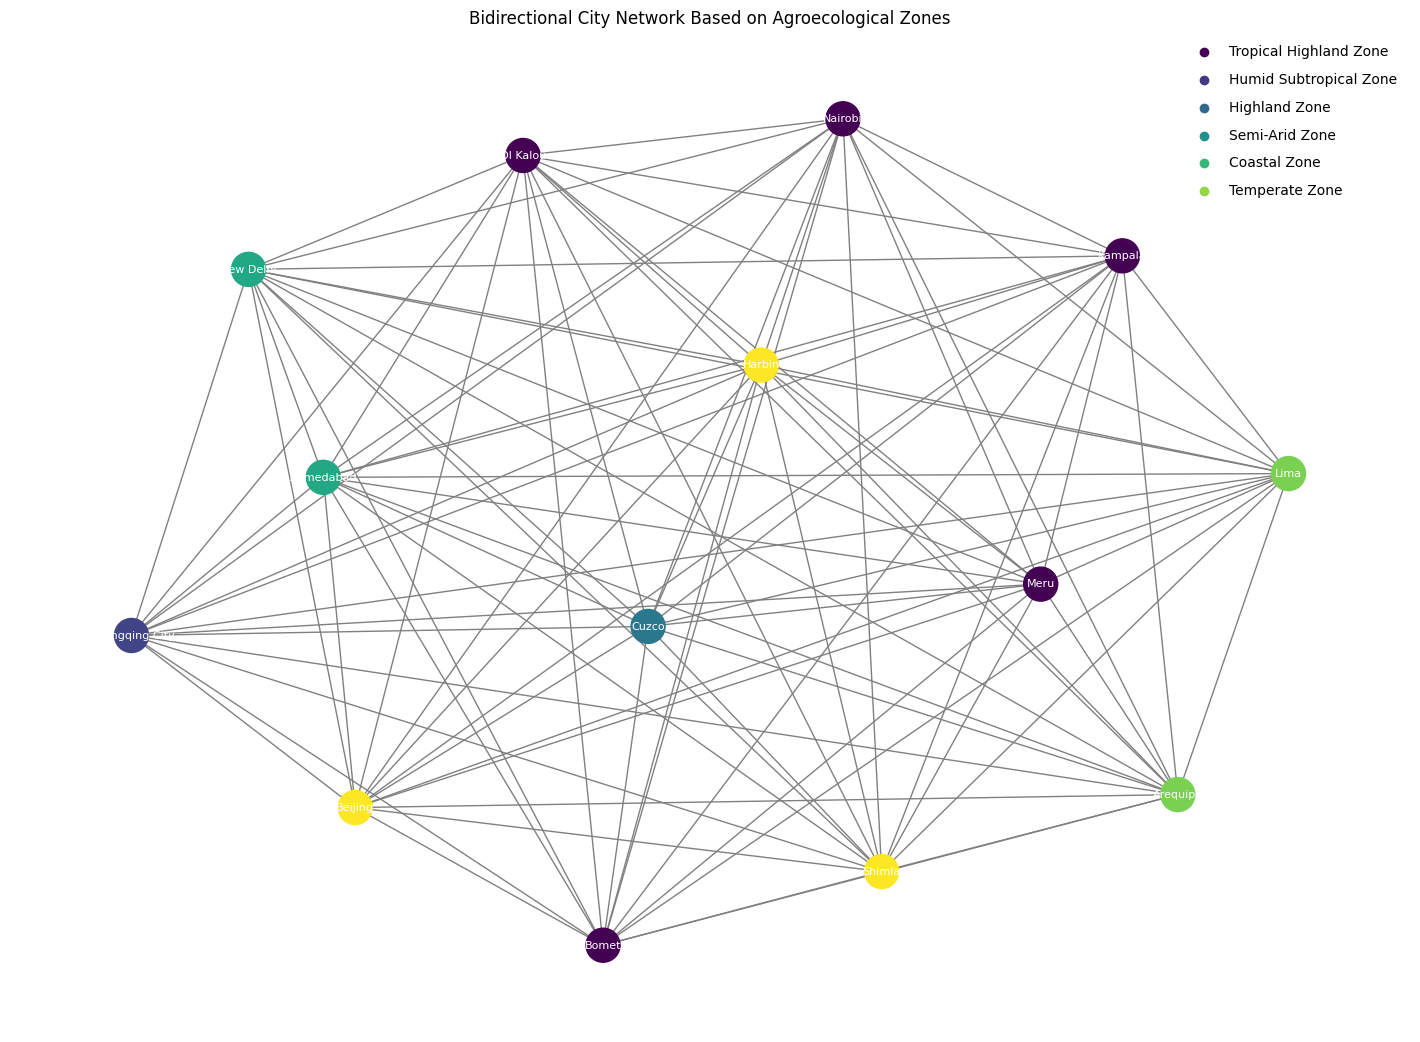

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the reference dataframe (a simplified example for illustration)
cities_data = [
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone"},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone"},
    {"City": "Beijing", "Country": "China", "Agroecological Zone": "Temperate Zone"},
    {"City": "New Delhi", "Country": "India", "Agroecological Zone": "Semi-Arid Zone"},
    {"City": "Kampala", "Country": "Uganda", "Agroecological Zone": "Tropical Highland Zone"},
    {"City": "Ol Kalou", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone"},
    {"City": "Meru", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone"},
    {"City": "Bomet", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone"},
    {"City": "Cuzco", "Country": "Peru", "Agroecological Zone": "Highland Zone"},
    {"City": "Arequipa", "Country": "Peru", "Agroecological Zone": "Coastal Zone"},
    {"City": "Shimla", "Country": "India", "Agroecological Zone": "Temperate Zone"},
    {"City": "Ahmedabad", "Country": "India", "Agroecological Zone": "Semi-Arid Zone"},
    {"City": "Harbin", "Country": "China", "Agroecological Zone": "Temperate Zone"},
    {"City": "Chongqing City", "Country": "China", "Agroecological Zone": "Humid Subtropical Zone"}
    # Add all remaining cities here
]

# Create a mapping of Agroecological Zones to integers for color coding
unique_zones = list(set(city["Agroecological Zone"] for city in cities_data))
zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Initialize the graph
G = nx.Graph()

# Add nodes with attributes
for city in cities_data:
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]]
    )

# Add bidirectional edges between all cities
city_names = [city["City"] for city in cities_data]
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        G.add_edge(city1, city2)

# Visualize the graph
plt.figure(figsize=(14, 10))

# Get node colors based on Agroecological Zone
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    node_size=600,
    font_size=8,
    font_color="white",
    edge_color="gray"
)

# Add a legend for the Agroecological Zones
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")

# Show the plot
plt.title("Bidirectional City Network Based on Agroecological Zones")
plt.show()


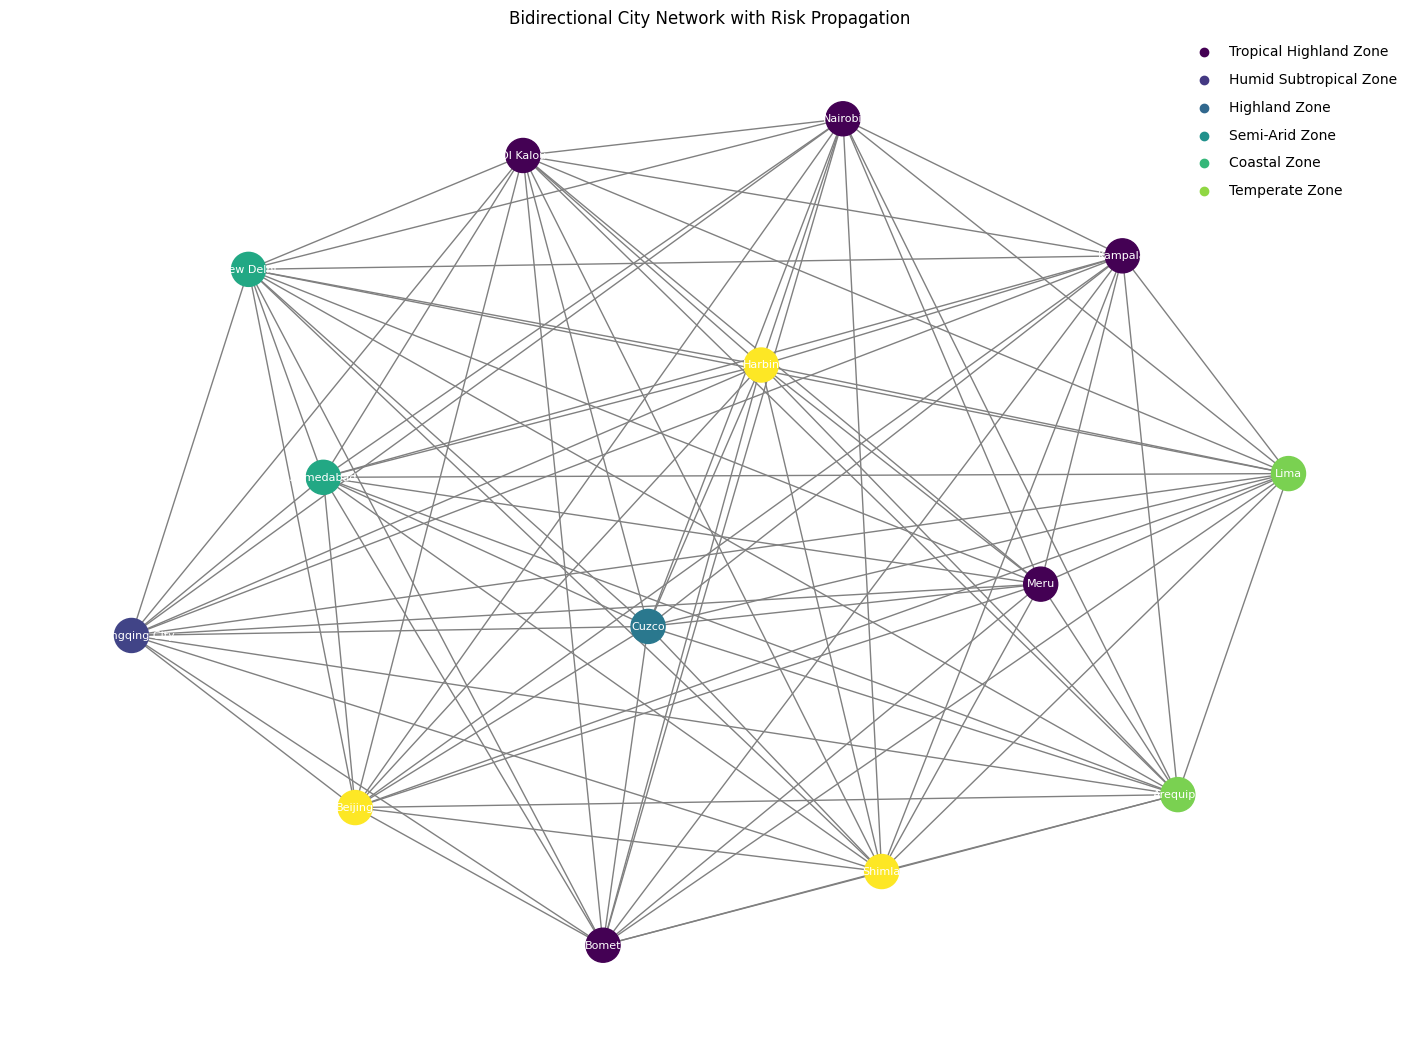

City: Nairobi, Risk Determinant: -14.476405542603073
City: Lima, Risk Determinant: -15.345267471261748
City: Beijing, Risk Determinant: 14.77420655984081
City: New Delhi, Risk Determinant: 14.955916368104454
City: Kampala, Risk Determinant: 14.865718622863989
City: Ol Kalou, Risk Determinant: 14.897429145193852
City: Meru, Risk Determinant: 15.492097694886867
City: Bomet, Risk Determinant: 15.366338525949754
City: Cuzco, Risk Determinant: 14.894398330810025
City: Arequipa, Risk Determinant: 15.243516732848764
City: Shimla, Risk Determinant: 15.681631844443299
City: Ahmedabad, Risk Determinant: 14.927118864927168
City: Harbin, Risk Determinant: 15.436019037577905
City: Chongqing City, Risk Determinant: 14.707076978140371


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, det

# Define the reference dataframe (a simplified example for illustration)
cities_data = [
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 2, 3]},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Risk_Vector": [2, 1, 4]},
    {"City": "Beijing", "Country": "China", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [3, 2, 1]},
    {"City": "New Delhi", "Country": "India", "Agroecological Zone": "Semi-Arid Zone", "Risk_Vector": [4, 1, 2]},
    {"City": "Kampala", "Country": "Uganda", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 3, 2]},
    {"City": "Ol Kalou", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 3, 4]},
    {"City": "Meru", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [2, 3, 4]},
    {"City": "Bomet", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 2, 5]},
    {"City": "Cuzco", "Country": "Peru", "Agroecological Zone": "Highland Zone", "Risk_Vector": [3, 4, 2]},
    {"City": "Arequipa", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Risk_Vector": [2, 1, 3]},
    {"City": "Shimla", "Country": "India", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [3, 2, 4]},
    {"City": "Ahmedabad", "Country": "India", "Agroecological Zone": "Semi-Arid Zone", "Risk_Vector": [4, 3, 2]},
    {"City": "Harbin", "Country": "China", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [2, 4, 3]},
    {"City": "Chongqing City", "Country": "China", "Agroecological Zone": "Humid Subtropical Zone", "Risk_Vector": [3, 5, 1]}
    # Add all remaining cities here
]

# Create a mapping of Agroecological Zones to integers for color coding
unique_zones = list(set(city["Agroecological Zone"] for city in cities_data))
zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Initialize the graph
G = nx.Graph()

# Add nodes with attributes
for city in cities_data:
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]],
        risk_vector=np.array(city["Risk_Vector"])
    )

# Add bidirectional edges between all cities with risk factors
city_names = [city["City"] for city in cities_data]
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        # Assign a random risk factor for the edge
        risk_factor = np.random.uniform(0.05, 0.2)
        G.add_edge(city1, city2, risk_factor=risk_factor)

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Simulate risk vector propagation through the network
def propagate_risk_vectors(graph, target_city):
    incoming_vectors = []
    for neighbor in graph.neighbors(target_city):
        node_vector = graph.nodes[neighbor]["risk_vector"]
        target_vector = graph.nodes[target_city]["risk_vector"]
        edge_risk = graph[neighbor][target_city]["risk_factor"]
        similarity = cosine_similarity(node_vector, target_vector)
        transferred_vector = node_vector * (1 - edge_risk * (1 - similarity))
        incoming_vectors.append(transferred_vector)

    if incoming_vectors:
        # Combine incoming vectors into a matrix
        matrix = np.array(incoming_vectors)
        determinant = det(matrix[:len(target_vector), :]) if len(matrix) >= len(target_vector) else None
        return determinant
    return None

# Evaluate risk for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant

# Visualize the graph
plt.figure(figsize=(14, 10))

# Get node colors based on Agroecological Zone
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    node_size=600,
    font_size=8,
    font_color="white",
    edge_color="gray"
)

# Add a legend for the Agroecological Zones
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")

# Show the plot
plt.title("Bidirectional City Network with Risk Propagation")
plt.show()

# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from numpy.linalg import norm, det

# Define the reference dataframe (a simplified example for illustration)
cities_data = [
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 2, 3]},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Risk_Vector": [2, 1, 4]},
    {"City": "Beijing", "Country": "China", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [3, 2, 1]},
    {"City": "New Delhi", "Country": "India", "Agroecological Zone": "Semi-Arid Zone", "Risk_Vector": [4, 1, 2]},
    {"City": "Kampala", "Country": "Uganda", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 3, 2]},
    {"City": "Ol Kalou", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 3, 4]},
    {"City": "Meru", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [2, 3, 4]},
    {"City": "Bomet", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Risk_Vector": [1, 2, 5]},
    {"City": "Cuzco", "Country": "Peru", "Agroecological Zone": "Highland Zone", "Risk_Vector": [3, 4, 2]},
    {"City": "Arequipa", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Risk_Vector": [2, 1, 3]},
    {"City": "Shimla", "Country": "India", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [3, 2, 4]},
    {"City": "Ahmedabad", "Country": "India", "Agroecological Zone": "Semi-Arid Zone", "Risk_Vector": [4, 3, 2]},
    {"City": "Harbin", "Country": "China", "Agroecological Zone": "Temperate Zone", "Risk_Vector": [2, 4, 3]},
    {"City": "Chongqing City", "Country": "China", "Agroecological Zone": "Humid Subtropical Zone", "Risk_Vector": [3, 5, 1]}
    # Add all remaining cities here
]

# Create a mapping of Agroecological Zones to integers for color coding
unique_zones = list(set(city["Agroecological Zone"] for city in cities_data))
zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Initialize the graph
G = nx.Graph()

# Add nodes with attributes
for city in cities_data:
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]],
        risk_vector=np.array(city["Risk_Vector"])
    )

# Add bidirectional edges between all cities with risk factors
city_names = [city["City"] for city in cities_data]
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        # Assign a random risk factor for the edge
        risk_factor = np.random.uniform(0.05, 0.2)
        G.add_edge(city1, city2, risk_factor=risk_factor)

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Simulate risk vector propagation through the network
def propagate_risk_vectors(graph, target_city):
    incoming_vectors = []
    for neighbor in graph.neighbors(target_city):
        node_vector = graph.nodes[neighbor]["risk_vector"]
        target_vector = graph.nodes[target_city]["risk_vector"]
        edge_risk = graph[neighbor][target_city]["risk_factor"]
        similarity = cosine_similarity(node_vector, target_vector)
        transferred_vector = node_vector * (1 - edge_risk * (1 - similarity))
        incoming_vectors.append(transferred_vector)

    if incoming_vectors:
        matrix = np.array(incoming_vectors)
        try:
            # Add padding to avoid shape mismatch issues
            if matrix.shape[1] < len(target_vector):
                padding = len(target_vector) - matrix.shape[1]
                matrix = np.pad(matrix, ((0, 0), (0, padding)), mode="constant")
            determinant = det(matrix[:len(target_vector), :])
        except ValueError:
            determinant = None
        return determinant
    return None


# Evaluate risk for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant

# Visualize the graph
plt.figure(figsize=(14, 10))

# Get node colors based on Agroecological Zone
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    node_size=600,
    font_size=8,
    font_color="white",
    edge_color="gray"
)

# Add a legend for the Agroecological Zones
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")

# Show the plot
#plt.title("Bidirectional City Network with Risk Propagation")
#plt.show()


plt.title("Bidirectional City Network with Risk Propagation")

# Create a PdfPages object to manage the PDF document
with PdfPages("city_network_risk.pdf") as pdf:
    # Save the current figure to a new page in the PDF
    pdf.savefig()

# (Optional) Close the plot window (if you don't want to display it)
plt.close()

# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


City: Nairobi, Risk Determinant: -14.430737433681545
City: Lima, Risk Determinant: -14.952997525454371
City: Beijing, Risk Determinant: 14.726458438984416
City: New Delhi, Risk Determinant: 14.625383669730898
City: Kampala, Risk Determinant: 14.810254800885255
City: Ol Kalou, Risk Determinant: 15.414401946169939
City: Meru, Risk Determinant: 15.577939552589221
City: Bomet, Risk Determinant: 15.127656685904808
City: Cuzco, Risk Determinant: 15.391564463147658
City: Arequipa, Risk Determinant: 15.407749429067064
City: Shimla, Risk Determinant: 15.541517289479374
City: Ahmedabad, Risk Determinant: 15.12133576169909
City: Harbin, Risk Determinant: 15.41935253061798
City: Chongqing City, Risk Determinant: 14.4413494779073


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from numpy.linalg import norm, det

# Define the reference city data with environmental attributes
cities_data = [
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Avg_Temperature": 20.0, "Humidity": 65, "Soil_pH": 6.5, "Risk_Vector": [1, 2, 3]},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Avg_Temperature": 22.0, "Humidity": 70, "Soil_pH": 7.0, "Risk_Vector": [2, 1, 4]},
    # Add other cities with Avg_Temperature, Humidity, and Soil_pH
]

# Define disease data with ideal ranges
disease_data = [
    {"Disease/Disorder": "Late Blight", "Ideal Temperature Range (°C)": "18-25", "Ideal Humidity Range (%)": "75-90", "Ideal pH Range": "5.5-7.0"},
    {"Disease/Disorder": "Bacterial Wilt", "Ideal Temperature Range (°C)": "25-30", "Ideal Humidity Range (%)": "80-95", "Ideal pH Range": "6.0-7.5"},
    # Add more diseases
]

# Helper function to parse string ranges
def parse_range(range_str):
    """Parse string ranges (e.g., '20-25°C') into tuples of floats."""
    return tuple(map(float, range_str.replace("°C", "").replace("%", "").split('-')))

# Suitability calculation function
def calculate_suitability(city, disease_row):
    temp_range = parse_range(disease_row['Ideal Temperature Range (°C)'])
    pH_range = parse_range(disease_row['Ideal pH Range'])
    humidity_range = parse_range(disease_row['Ideal Humidity Range (%)'])
    
    temp_suitability = int(temp_range[0] <= city['Avg_Temperature'] <= temp_range[1])
    pH_suitability = int(pH_range[0] <= city['Soil_pH'] <= pH_range[1])
    humidity_suitability = int(humidity_range[0] <= city['Humidity'] <= humidity_range[1])
    
    return temp_suitability + pH_suitability + humidity_suitability

# Calculate suitability scores and append to Risk_Vector
for city in cities_data:
    suitability_scores = [
        calculate_suitability(city, disease) for disease in disease_data
    ]
    city['Risk_Vector'] += suitability_scores

# Graph initialization
G = nx.Graph()
unique_zones = list(set(city["Agroecological Zone"] for city in cities_data))
zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Add nodes with updated risk vectors
for city in cities_data:
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]],
        risk_vector=np.array(city["Risk_Vector"]),
    )

# Add bidirectional edges with random risk factors
city_names = [city["City"] for city in cities_data]
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        risk_factor = np.random.uniform(0.05, 0.2)
        G.add_edge(city1, city2, risk_factor=risk_factor)

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def propagate_risk_vectors(graph, target_city):
    incoming_vectors = []
    for neighbor in graph.neighbors(target_city):
        node_vector = graph.nodes[neighbor]["risk_vector"]
        target_vector = graph.nodes[target_city]["risk_vector"]
        edge_risk = graph[neighbor][target_city]["risk_factor"]
        similarity = cosine_similarity(node_vector, target_vector)
        transferred_vector = node_vector * (1 - edge_risk * (1 - similarity))
        incoming_vectors.append(transferred_vector)

    if incoming_vectors:
        # Ensure we have enough rows to form a square matrix
        vector_dim = len(incoming_vectors[0])  # Dimension of vectors
        if len(incoming_vectors) >= vector_dim:
            square_matrix = np.array(incoming_vectors[:vector_dim])
            matrix_determinant = det(square_matrix)
        else:
            matrix_determinant = None  # Not enough rows for a square matrix
        return matrix_determinant
    return None


# Evaluate risk for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant

# Visualization
plt.figure(figsize=(14, 10))
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    cmap=plt.cm.viridis, node_size=600, font_size=8, font_color="white", edge_color="gray"
)
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")
plt.title("City Network with Risk and Suitability Propagation")

# Save to PDF
with PdfPages("city_network_risk_with_suitability.pdf") as pdf:
    pdf.savefig()
plt.close()

# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


City: Nairobi, Risk Determinant: None
City: Lima, Risk Determinant: None


In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from numpy.linalg import norm, det

import pandas as pd

# Define cities data
cities_data = merged_df
"""
pd.DataFrame([
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Avg_Temperature": 20.0, "Humidity": 65, "Soil_pH": 6.5, "Risk_Vector": []},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Avg_Temperature": 22.0, "Humidity": 70, "Soil_pH": 7.0, "Risk_Vector": []},
])
"""
# Define disease data
disease_data = PotatoDiseaseData

"""
= pd.DataFrame([
    {"Disease/Disorder": "Late Blight", "Ideal Temperature Range (°C)": "18-25", "Ideal Humidity Range (%)": "75-90", "Ideal pH Range": "5.5-7.0"},
    {"Disease/Disorder": "Bacterial Wilt", "Ideal Temperature Range (°C)": "25-30", "Ideal Humidity Range (%)": "80-95", "Ideal pH Range": "6.0-7.5"},
])
"""
# Helper function to parse ranges
def parse_range(range_str):
    """Parse string ranges (e.g., '20-25°C') into tuples of floats."""
    return tuple(map(float, range_str.replace("°C", "").replace("%", "").split('-')))

# Suitability calculation function
def calculate_suitability_from_disease_data(city, disease_data):
    suitability_scores = []
    for _, disease_row in disease_data.iterrows():
        disease_name = disease_row['Disease/Disorder']
        temp_range = parse_range(disease_row['Ideal Temperature Range (°C)'])
        pH_range = parse_range(disease_row['Ideal pH Range'])
        humidity_range = parse_range(disease_row['Ideal Humidity Range'])

        # Calculate suitability
        temp_suitability = int(temp_range[0] <= city['Mean Temperature'] <= temp_range[1])
        #pH_suitability = int(pH_range[0] <= city['Soil_pH'] <= pH_range[1])
        humidity_suitability = int(humidity_range[0] <= city['Mean Humidity'] <= humidity_range[1])
        wind_suitability = 1  # You might consider adding wind speed criteria here

        # Calculate total suitability score
        total_score = temp_suitability + humidity_suitability + wind_suitability
        suitability_scores.append([disease_name, total_score, city['Mean Temperature'], city['Mean Humidity'], city['Mean Wind Speed']])

    return suitability_scores
    
cities_data["Risk_Vector"] = np.nan

# Ensure Risk_Vector column exists
cities_data["Risk_Vector"] = [None] * len(cities_data)

# Update Risk_Vector column
for index, city in cities_data.iterrows():
    suitability_scores = calculate_suitability_from_disease_data(city, disease_data)
    
    # Ensure it's stored as a list
    cities_data.at[index, "Risk_Vector"] = [score for _, score, _, _, _ in calculate_suitability_from_disease_data(city, disease_data)]
    #cities_data.at[index, "Risk_Vector"] = calculate_suitability_from_disease_data(city, disease_data)
    #cities_data.at[index, "Risk_Vector"] = list(suitability_scores.values())

"""# Calculate suitability scores and append to Risk_Vector
for index, city in cities_data.iterrows():
    suitability_scores = calculate_suitability_from_disease_data(city, disease_data)
    cities_data.at[index, 'Risk_Vector'] = list(suitability_scores.values())
"""
# Output updated DataFrame
print(cities_data[['City', 'Risk_Vector']])


# Graph initialization
G = nx.Graph()
unique_zones = list(set(cities_data["Agroecological Zone"]))

zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Add nodes with updated risk vectors
for _, city in cities_data.iterrows():
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]],
        risk_vector=np.array(city["Risk_Vector"]),
    )

# Generate city names from DataFrame
city_names = [city["City"] for _, city in cities_data.iterrows()]

# Add bidirectional edges with random risk factors
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        risk_factor = np.random.uniform(0.05, 0.2)
        G.add_edge(city1, city2, risk_factor=risk_factor)


# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Use Gram determinant for non-square matrices
def gram_determinant(vectors):
    """Calculate the determinant of the Gram matrix formed by vectors."""
    gram_matrix = np.dot(vectors, vectors.T)
    return det(gram_matrix)

# Propagate risk vectors
def propagate_risk_vectors(graph, target_city):
    incoming_vectors = []
    for neighbor in graph.neighbors(target_city):
        node_vector = graph.nodes[neighbor]["risk_vector"]
        target_vector = graph.nodes[target_city]["risk_vector"]
        edge_risk = graph[neighbor][target_city]["risk_factor"]
        similarity = cosine_similarity(node_vector, target_vector)
        transferred_vector = node_vector * (1 - edge_risk * (1 - similarity))
        incoming_vectors.append(transferred_vector)

    if incoming_vectors:
        incoming_vectors = np.array(incoming_vectors)
        if incoming_vectors.shape[0] >= incoming_vectors.shape[1]:
            matrix_determinant = det(incoming_vectors[:incoming_vectors.shape[1]])
        else:
            matrix_determinant = gram_determinant(incoming_vectors)
        return matrix_determinant
    return None

# Evaluate risk for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant

# Visualization
plt.figure(figsize=(14, 10))
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    cmap=plt.cm.viridis, node_size=600, font_size=8, font_color="white", edge_color="gray"
)
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")
plt.title("City Network with Risk and Suitability Propagation")

# Save to PDF
with PdfPages("city_network_risk_with_suitability.pdf") as pdf:
    pdf.savefig()
plt.close()

# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


          City                        Risk_Vector
0      Abancay  [2, 1, 3, 1, 2, 3, 3, 2, 2, 3, 3]
1         Agra  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
2    Ahmedabad  [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
3      Aligarh  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
4       Almora  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
..         ...                                ...
172   Yinchuan  [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1]
173  Yongchuan  [2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
174      Yulin  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
175   Zhongwei  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176      Zunyi  [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1]

[177 rows x 2 columns]
City: Abancay, Risk Determinant: 0.0
City: Agra, Risk Determinant: -9.107450904648025e-97
City: Ahmedabad, Risk Determinant: 0.0
City: Aligarh, Risk Determinant: 3.139391766524268e-159
City: Almora, Risk Determinant: 0.0
City: Amritsar, Risk Determinant: 0.0
City: Andahuaylas, Risk Determinant: 0.0
City: Anshun, Risk Determinant: 0.0
City: Arequipa, Risk Determinant: 0.0
Ci

In [17]:
#merged_df.head(5)

In [18]:
suitability_scores

[['Common Scab', 1, 3.9333333333333336, 87.66666666666667, 0.9400000000000001],
 ['Early Blight',
  2,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Fusarium Dry Rot',
  1,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Black Dot', 2, 3.9333333333333336, 87.66666666666667, 0.9400000000000001],
 ['Silver Scurf',
  2,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Black Scurf', 1, 3.9333333333333336, 87.66666666666667, 0.9400000000000001],
 ['Rhizoctonia Canker',
  1,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Pink Rot', 2, 3.9333333333333336, 87.66666666666667, 0.9400000000000001],
 ['Pythium Leak',
  2,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Brown Center',
  1,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001],
 ['Hollow Heart',
  1,
  3.9333333333333336,
  87.66666666666667,
  0.9400000000000001]]

In [19]:
disease_data.head(5)

,Disease/Disorder,Pathogen/Causes,Affected Parts,Affected Parts.1,Affected Parts.2,Lesion Characteristics,Control Measures,Additional Notes,Temperature Triggers,Other Triggers,Ideal Temperature Range (°C),Ideal pH Range,Ideal Humidity Range,Ideal Sun Intensity,Spred
0,Common Scab,Streptomyces spp.,Tubers,NaN,NaN,"Tan to dark brown, circular or irregular lesio...",Controlled at soil pH levels of 5.2 or lower,Closely related species (acid scab) can surviv...,Not temperature-specific,High soil pH levels; low organic matter in soi...,20-25°C,5.2-7.5,60-80%,Moderate to high,Airborne
1,Early Blight,Alternaria solani,Foliage,Tubers,NaN,"Dark, sunken, and circular lesions on tubers; ...",NaN,Usually affects foliage but can infect tubers too,"Prefers warm, wet conditions",Extended periods of wetness; poor air circulat...,24-29°C,5.5-7.0,80-100%,Moderate,Soil borne
2,Fusarium Dry Rot,Fusarium spp.,Tubers,NaN,NaN,Internal light to dark brown or black dry rot;...,NaN,Often rots out the center of the tuber,Can develop at a wide range of temperatures,Entry through wounds or bruises on tubers; poo...,15-20°C,5.5-7.0,60-80%,Moderate,Insects
3,Black Dot,Colletotrichum coccodes,Foliage,Tubers,NaN,Nearly indistinguishable from early blight on ...,NaN,Symptoms on tubers can be mistaken for silver ...,"Warm, moist conditions",High humidity; poor air circulation; infected ...,25-30°C,5.5-7.0,80-100%,Moderate,Herbivors
4,Silver Scurf,Helminthosporium solani,Tuber periderm (skin),NaN,NaN,Lesions start as small pale brown spots at the...,NaN,Lesions can coalesce to form large affected ar...,"Prefers cool, moist conditions",Poor storage conditions; high humidity during ...,10-20°C,5.5-7.0,80-100%,Low to moderate,NaN


In [13]:
Risk_Vector

NameError: name 'Risk_Vector' is not defined

In [42]:
import numpy as np
import networkx as nx

# Define city names
city_names = ["Nairobi", "Lima", "Abancay"]

# Initialize the graph
G = nx.Graph()

# Assign a unique matrix to each city
for city in city_names:
    transformation_matrix = np.random.uniform(0.5, 1.5, size=(5, 5))  # 5x5 matrix for each city
    G.add_node(city, transformation_matrix=transformation_matrix)

# Assign a unique vector to each edge
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        edge_vector = np.random.uniform(0.1, 0.5, size=5)  # 5-dimensional vector for each edge
        G.add_edge(city1, city2, edge_vector=edge_vector)

# Function to calculate outgoing vector for a target city
def calculate_outgoing_vector(graph, target_city):
    # Get the city's matrix
    city_matrix = graph.nodes[target_city]["transformation_matrix"]
    outgoing_vectors = []

    # Iterate over all neighbors of the city
    for neighbor in graph.neighbors(target_city):
        # Get the edge vector for the connection between target_city and the neighbor
        edge_vector = graph[target_city][neighbor]["edge_vector"]

        # Transform the city's matrix by the edge vector
        transformed_vector = np.dot(city_matrix, edge_vector)

        # Store the transformed vector
        outgoing_vectors.append(transformed_vector)

    # Aggregate all transformed vectors to produce the outgoing vector
    if outgoing_vectors:
        outgoing_vector = np.sum(outgoing_vectors, axis=0)  # Summing all outgoing vectors
    else:
        outgoing_vector = np.zeros(city_matrix.shape[0])  # Default if no neighbors

    return outgoing_vector

# Function to propagate vectors across the network
def propagate_vectors(graph):
    results = {}
    for city in graph.nodes:
        outgoing_vector = calculate_outgoing_vector(graph, city)
        results[city] = outgoing_vector
    return results

# Example: Calculate outgoing vectors for all cities
outgoing_results = propagate_vectors(G)

# Print the outgoing vectors for each city
for city, outgoing_vector in outgoing_results.items():
    print(f"City: {city}, Outgoing Vector: {outgoing_vector}")


City: Nairobi, Outgoing Vector: [2.69184036 2.7033197  2.80810311 2.71300832 2.30768918]
City: Lima, Outgoing Vector: [2.36907037 2.26510158 3.39915091 2.25398902 2.52038414]
City: Abancay, Outgoing Vector: [2.66221659 3.05344077 2.85446245 2.64622905 3.16025252]


**THE WORKING CODE**
**THE WORKING CODE**
**THE WORKING CODE**
**THE WORKING CODE**
**THE WORKING CODE**
**THE WORKING CODE**

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from numpy.linalg import norm, det

import pandas as pd

# Define cities data
cities_data = merged_df
"""
pd.DataFrame([
    {"City": "Nairobi", "Country": "Kenya", "Agroecological Zone": "Tropical Highland Zone", "Avg_Temperature": 20.0, "Humidity": 65, "Soil_pH": 6.5, "Risk_Vector": []},
    {"City": "Lima", "Country": "Peru", "Agroecological Zone": "Coastal Zone", "Avg_Temperature": 22.0, "Humidity": 70, "Soil_pH": 7.0, "Risk_Vector": []},
])
"""
# Define disease data
disease_data = PotatoDiseaseData

"""
= pd.DataFrame([
    {"Disease/Disorder": "Late Blight", "Ideal Temperature Range (°C)": "18-25", "Ideal Humidity Range (%)": "75-90", "Ideal pH Range": "5.5-7.0"},
    {"Disease/Disorder": "Bacterial Wilt", "Ideal Temperature Range (°C)": "25-30", "Ideal Humidity Range (%)": "80-95", "Ideal pH Range": "6.0-7.5"},
])
"""
# Helper function to parse ranges
def parse_range(range_str):
    """Parse string ranges (e.g., '20-25°C') into tuples of floats."""
    return tuple(map(float, range_str.replace("°C", "").replace("%", "").split('-')))

# Suitability calculation function
def calculate_suitability_from_disease_data(city, disease_data):
    suitability_scores = []
    for _, disease_row in disease_data.iterrows():
        disease_name = disease_row['Disease/Disorder']
        temp_range = parse_range(disease_row['Ideal Temperature Range (°C)'])
        pH_range = parse_range(disease_row['Ideal pH Range'])
        humidity_range = parse_range(disease_row['Ideal Humidity Range'])

        # Calculate suitability
        temp_suitability = int(temp_range[0] <= city['Mean Temperature'] <= temp_range[1])
        #pH_suitability = int(pH_range[0] <= city['Soil_pH'] <= pH_range[1])
        humidity_suitability = int(humidity_range[0] <= city['Mean Humidity'] <= humidity_range[1])
        wind_suitability = 1  # You might consider adding wind speed criteria here

        # Calculate total suitability score
        total_score = temp_suitability + humidity_suitability + wind_suitability
        suitability_scores.append([disease_name, total_score, city['Mean Temperature'], city['Mean Humidity'], city['Mean Wind Speed']])

    return suitability_scores
    
cities_data["Risk_Vector"] = np.nan

# Ensure Risk_Vector column exists
cities_data["Risk_Vector"] = [None] * len(cities_data)

# Update Risk_Vector column
for index, city in cities_data.iterrows():
    suitability_scores = calculate_suitability_from_disease_data(city, disease_data)
    
    # Ensure it's stored as a list
    cities_data.at[index, "Risk_Vector"] = [score for _, score, _, _, _ in calculate_suitability_from_disease_data(city, disease_data)]
    #cities_data.at[index, "Risk_Vector"] = calculate_suitability_from_disease_data(city, disease_data)
    #cities_data.at[index, "Risk_Vector"] = list(suitability_scores.values())

"""# Calculate suitability scores and append to Risk_Vector
for index, city in cities_data.iterrows():
    suitability_scores = calculate_suitability_from_disease_data(city, disease_data)
    cities_data.at[index, 'Risk_Vector'] = list(suitability_scores.values())
"""
# Output updated DataFrame
print(cities_data[['City', 'Risk_Vector']])


# Graph initialization
G = nx.Graph()
unique_zones = list(set(cities_data["Agroecological Zone"]))

zone_mapping = {zone: idx for idx, zone in enumerate(unique_zones)}

# Add nodes with updated risk vectors
for _, city in cities_data.iterrows():
    G.add_node(
        city["City"],
        country=city["Country"],
        zone=city["Agroecological Zone"],
        zone_id=zone_mapping[city["Agroecological Zone"]],
        risk_vector=np.array(city["Risk_Vector"]),
    )

# Generate city names from DataFrame
city_names = [city["City"] for _, city in cities_data.iterrows()]

# Assign a unique vector to each edge
for i, city1 in enumerate(city_names):
    for city2 in city_names[i + 1:]:
        edge_vector = np.random.uniform(0.1, 0.5, size=5)  # 5-dimensional vector for each edge
        G.add_edge(city1, city2, edge_vector=edge_vector)


# Function to calculate cosine similarity
#Here create a function to Calculate the matrix - vector product.... that is 
#the matrix in the node by the edge_vector in the bidirectional network from one city to anothe
# Function to calculate the matrix-vector product

def calculate_transformed_vector(risk_vector, edge_vector):
    """
    Compute the transformed vector by multiplying the city's matrix
    by the edge vector.
    """
    return np.dot(risk_vector, edge_vector)



# Use Gram determinant for non-square matrices
def gram_determinant(vectors):
    """Calculate the determinant of the Gram matrix formed by vectors."""
    gram_matrix = np.dot(vectors, vectors.T)
    return det(gram_matrix)

# Function to adjust edge vector dynamically
def adjust_edge_vector(city_matrix, edge_vector):
    """
    Adjust the edge vector to match the city's matrix column dimensions.
    If too short, pad with zeros. If too long, truncate.
    """
    matrix_cols = city_matrix.shape[1] if len(city_matrix.shape) > 1 else len(city_matrix)
    edge_len = len(edge_vector)
    
    if edge_len < matrix_cols:
        # Pad edge vector with zeros
        edge_vector = np.pad(edge_vector, (0, matrix_cols - edge_len), 'constant')
    elif edge_len > matrix_cols:
        # Truncate edge vector
        edge_vector = edge_vector[:matrix_cols]

    return edge_vector

# Updated function for matrix-vector product
def calculate_transformed_vector(city_matrix, edge_vector):
    """
    Compute the transformed vector by multiplying the city's matrix
    by the edge vector. Adjust the edge vector dynamically if needed.
    """
    adjusted_edge_vector = adjust_edge_vector(city_matrix, edge_vector)
    return np.dot(city_matrix, adjusted_edge_vector)

# Updated propagate_risk_vectors function
def propagate_risk_vectors(graph, target_city):
    """
    Propagate risk vectors through the network by combining edge vectors
    with city matrices, and calculate the Gram determinant.
    """
    incoming_transformed_vectors = []

    # Retrieve the target city's matrix
    city_matrix = graph.nodes[target_city].get("risk_vector", np.eye(5))  # Default to identity matrix if missing

    for neighbor in graph.neighbors(target_city):
        # Retrieve the edge vector
        edge_vector = graph[neighbor][target_city]["edge_vector"]

        # Adjust dimensions and transform the city's matrix with the edge vector
        transformed_vector = calculate_transformed_vector(city_matrix, edge_vector)

        # Append the transformed vector to incoming vectors
        incoming_transformed_vectors.append(transformed_vector)

    # Check if there are any incoming transformed vectors
    if len(incoming_transformed_vectors) == 0:
        return None  # No valid incoming vectors to process

    # Convert to a numpy array
    incoming_transformed_vectors = np.array(incoming_transformed_vectors)

    # Ensure the array is at least 2D
    if len(incoming_transformed_vectors.shape) == 1:
        incoming_transformed_vectors = incoming_transformed_vectors[np.newaxis, :]

    # If more rows than columns, truncate to square for determinant
    if incoming_transformed_vectors.shape[0] >= incoming_transformed_vectors.shape[1]:
        incoming_transformed_vectors = incoming_transformed_vectors[:incoming_transformed_vectors.shape[1], :]

    # Calculate Gram determinant
    determinant = gram_determinant(incoming_transformed_vectors)
    return determinant


# Evaluate risk for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant

# Visualization
plt.figure(figsize=(14, 10))
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    cmap=plt.cm.viridis, node_size=600, font_size=8, font_color="white", edge_color="gray"
)
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")
plt.title("City Network with Risk and Suitability Propagation")

# Save to PDF
with PdfPages("city_network_risk_with_suitability.pdf") as pdf:
    pdf.savefig()
plt.close()

# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


          City                        Risk_Vector
0      Abancay  [2, 1, 3, 1, 2, 3, 3, 2, 2, 3, 3]
1         Agra  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
2    Ahmedabad  [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
3      Aligarh  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
4       Almora  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
..         ...                                ...
172   Yinchuan  [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1]
173  Yongchuan  [2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
174      Yulin  [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2]
175   Zhongwei  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176      Zunyi  [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1]

[177 rows x 2 columns]
City: Abancay, Risk Determinant: 1358.7478001645002
City: Agra, Risk Determinant: 608.0321771474024
City: Ahmedabad, Risk Determinant: 579.8314303236411
City: Aligarh, Risk Determinant: 595.6483684730883
City: Almora, Risk Determinant: 424.4866718292647
City: Amritsar, Risk Determinant: 799.7634111391168
City: Andahuaylas, Risk Determinant: 1119.6250425315313
City: Anshun, 

In [49]:
# Function to calculate the matrix-vector product
def calculate_transformed_vector(city_matrix, edge_vector):
    """
    Compute the transformed vector by multiplying the city's matrix
    by the edge vector.
    """
    return np.dot(city_matrix, edge_vector)

# Propagate risk vectors across the network
def propagate_risk_vectors(graph, target_city):
    """
    Propagate risk vectors through the network by combining edge vectors
    with city matrices, and calculate the Gram determinant.
    """
    incoming_transformed_vectors = []

    # Retrieve the target city's matrix
    city_matrix = graph.nodes[target_city].get("risk_vector", np.eye(5))  # Default to identity if missing

    for neighbor in graph.neighbors(target_city):
        # Retrieve the edge vector
        edge_vector = graph[neighbor][target_city]["edge_vector"]

        # Transform neighbor's matrix with the edge vector
        transformed_vector = calculate_transformed_vector(city_matrix, edge_vector)

        # Append transformed vector to incoming vectors
        incoming_transformed_vectors.append(transformed_vector)

    # Aggregate incoming vectors and calculate the Gram determinant
    if incoming_transformed_vectors:
        incoming_transformed_vectors = np.array(incoming_transformed_vectors)

        # If more rows than columns, truncate to square for determinant
        if incoming_transformed_vectors.shape[0] >= incoming_transformed_vectors.shape[1]:
            incoming_transformed_vectors = incoming_transformed_vectors[:incoming_transformed_vectors.shape[1], :]

        # Calculate Gram determinant
        determinant = gram_determinant(incoming_transformed_vectors)
        return determinant

    # Return None if no incoming vectors
    return None

# Use Gram determinant for non-square matrices
def gram_determinant(vectors):
    """
    Calculate the determinant of the Gram matrix formed by vectors.
    """
    gram_matrix = np.dot(vectors, vectors.T)
    return det(gram_matrix)

# Evaluate risk determinants for each city
city_risk_determinants = {}
for city in city_names:
    determinant = propagate_risk_vectors(G, city)
    city_risk_determinants[city] = determinant
"""
# Visualization (same as before)
plt.figure(figsize=(14, 10))
node_colors = [G.nodes[node]["zone_id"] for node in G.nodes]
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    cmap=plt.cm.viridis, node_size=600, font_size=8, font_color="white", edge_color="gray"
)
legend_labels = {zone_mapping[zone]: zone for zone in zone_mapping}
for zone_id, zone_name in legend_labels.items():
    plt.scatter([], [], color=plt.cm.viridis(zone_id / len(zone_mapping)), label=zone_name)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc="upper right")
plt.title("City Network with Risk and Suitability Propagation")

# Save to PDF
with PdfPages("city_network_risk_with_suitability.pdf") as pdf:
    pdf.savefig()
plt.close()
"""
# Display risk determinants
for city, determinant in city_risk_determinants.items():
    print(f"City: {city}, Risk Determinant: {determinant}")


ValueError: shapes (11,) and (5,) not aligned: 11 (dim 0) != 5 (dim 0)